In [2]:
#importing useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.stats import pearsonr
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [3]:
#importing and loading the dataset
data = pd.read_csv('insurance.csv')
data = data.drop(columns = ['Unnamed: 7','Unnamed: 8'])
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
#statistical summary of the data
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
#Average charge for smokers vs non smokers
mean_charges_by_smoker = data[['smoker','charges']].groupby('smoker').mean().reset_index()
mean_charges_by_smoker.rename(columns = {'charges':'average_charge'},inplace= True)
smoker_to_non_smoker_ratio = round(mean_charges_by_smoker['average_charge'][1]/mean_charges_by_smoker['average_charge'][0],2)
print("The average medical insurance charge on a smoker is",smoker_to_non_smoker_ratio*100,'%','higher than the charge on a non-smoker')

The average medical insurance charge on a smoker is 380.0 % higher than the charge on a non-smoker


In [6]:
mean_charges_by_smoker

,smoker,average_charge
0,no,8434.268298
1,yes,32050.231832


In [8]:
#choosing the bins to divide the age values
bins_age = np.arange(17,68,4)

In [11]:
#viewing the average charges per age bin
mean_charges_by_age = data['charges'].groupby([pd.cut(data['age'],bins_age)]).mean().reset_index()
mean_charges_by_age

,age,charges
0,"(17, 21]",8138.613823
1,"(21, 25]",10729.783529
2,"(25, 29]",9445.678327
3,"(29, 33]",11128.321890
4,"(33, 37]",13269.712696
5,"(37, 41]",10341.599360
6,"(41, 45]",15737.673376
7,"(45, 49]",14849.841783
8,"(49, 53]",16408.959990
9,"(53, 57]",16639.695399


C:\Users\ahmad\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


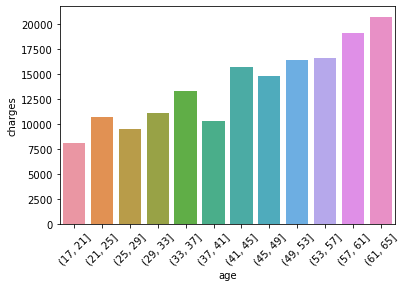

In [13]:
#plotting the average charges per age bin
ax = sns.barplot(mean_charges_by_age['age'],mean_charges_by_age['charges'])
plt.xticks(rotation=45)
sns.color_palette('Set3')
plt.show()

In [16]:
#Grouping the age bins dataframe by smoker/non-smoker to see how much smokers and non-smokers are charged in each age group
mean_charges_by_age_smoker = data[['charges','smoker']].groupby([pd.cut(data['age'],bins_age),'smoker']).mean().reset_index()
mean_charges_by_age_smoker

,age,smoker,charges
0,"(17, 21]",no,3481.790476
1,"(17, 21]",yes,25516.515581
2,"(21, 25]",no,4911.724120
3,"(21, 25]",yes,32062.668026
4,"(25, 29]",no,5528.893702
5,"(25, 29]",yes,26231.898146
6,"(29, 33]",no,5471.080786
7,"(29, 33]",yes,29457.783069
8,"(33, 37]",no,6884.260747
9,"(33, 37]",yes,32681.486620


In [19]:
#adding a ratio column of smoker/non-smoker count for each age group
count_charges_by_age_smoker = data[['charges','smoker']].groupby([pd.cut(data['age'],bins_age),'smoker']).count().reset_index()
count_charges_by_age_smoker
i=0
j=1
ratio_age=[]
while i <= 22:
    while j <= 23:
        ratio_age.append(count_charges_by_age_smoker.loc[j]['charges']/count_charges_by_age_smoker.loc[i]['charges'])
        i=i+2
        j=j+2
ratio_full = []
for x in ratio_age:
    ratio_full.extend([x,x])
count_charges_by_age_smoker['smoker_to_none_ratio'] = ratio_full
count_charges_by_age_smoker

,age,smoker,charges,smoker_to_none_ratio
0,"(17, 21]",no,153,0.267974
1,"(17, 21]",yes,41,0.267974
2,"(21, 25]",no,88,0.272727
3,"(21, 25]",yes,24,0.272727
4,"(25, 29]",no,90,0.233333
5,"(25, 29]",yes,21,0.233333
6,"(29, 33]",no,81,0.308642
7,"(29, 33]",yes,25,0.308642
8,"(33, 37]",no,76,0.328947
9,"(33, 37]",yes,25,0.328947


In [21]:
#viewing average charges by gender
mean_charges_by_gender = data[['sex','charges']].groupby('sex').mean().reset_index()
mean_charges_by_gender

,sex,charges
0,female,12569.578844
1,male,13956.751178


In [22]:
#Choosing bins for bmi values
bins_bmi = np.arange(15,57,3)

In [24]:
#dataframe showing average charges for each bmi range
mean_charges_by_bmi = data['charges'].groupby(pd.cut(data['bmi'],bins_bmi,'charges')).mean().reset_index()
mean_charges_by_bmi

,bmi,charges
0,"(15, 18]",7576.420217
1,"(18, 21]",8687.396745
2,"(21, 24]",10202.868942
3,"(24, 27]",11335.007019
4,"(27, 30]",11080.205884
5,"(30, 33]",14372.889428
6,"(33, 36]",15213.030909
7,"(36, 39]",18431.374551
8,"(39, 42]",14270.362134
9,"(42, 45]",17238.756989


In [26]:
#factoring in the smoker variable to each bmi range
mean_charges_by_bmi_smoker = data[['charges','smoker']].groupby([pd.cut(data['bmi'],bins_bmi),'smoker']).mean().reset_index()
mean_charges_by_bmi_smoker

,bmi,smoker,charges
0,"(15, 18]",no,3510.948941
1,"(15, 18]",yes,18756.466225
2,"(18, 21]",no,5897.926360
3,"(18, 21]",yes,18323.748982
4,"(21, 24]",no,7680.709710
5,"(21, 24]",yes,20190.619498
6,"(24, 27]",no,8496.093121
7,"(24, 27]",yes,22136.728189
8,"(27, 30]",no,8335.932055
9,"(27, 30]",yes,22225.317963


In [27]:
#adding the proportion of smokers for each bmi range
count_charges_by_bmi_smoker = data[['charges','smoker']].groupby([pd.cut(data['bmi'],bins_bmi),'smoker']).agg('count').reset_index()
i=0
j=1
ratio=[]
while i <= 24:
    while j <= 25:
        ratio.append(count_charges_by_bmi_smoker.loc[j]['charges']/count_charges_by_bmi_smoker.loc[i]['charges'])
        i=i+2
        j=j+2
ratio_full = []
for x in ratio:
    ratio_full.extend([x,x])

In [28]:
count_charges_by_bmi_smoker['ratio_smoker_to_none'] = ratio_full
count_charges_by_bmi_smoker

,bmi,smoker,charges,ratio_smoker_to_none
0,"(15, 18]",no,11,0.363636
1,"(15, 18]",yes,4,0.363636
2,"(18, 21]",no,38,0.289474
3,"(18, 21]",yes,11,0.289474
4,"(21, 24]",no,99,0.252525
5,"(21, 24]",yes,25,0.252525
6,"(24, 27]",no,156,0.262821
7,"(24, 27]",yes,41,0.262821
8,"(27, 30]",no,199,0.246231
9,"(27, 30]",yes,49,0.246231


C:\Users\ahmad\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


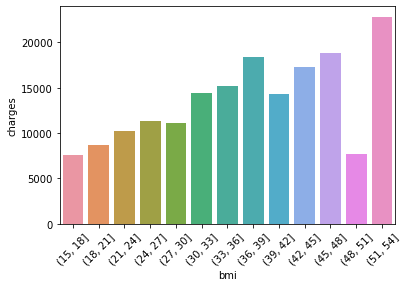

In [30]:
#plotting the average costs for each bmi range
ax = sns.barplot(mean_charges_by_bmi['bmi'],mean_charges_by_bmi['charges'])
plt.xticks(rotation=45)
sns.color_palette('Set3')
plt.show()

In [32]:
#viewing the average charges for each possible number of children per family
charges_by_children = data[['children','charges']].groupby('children').mean().reset_index()
charges_by_children

,children,charges
0,0,12365.975602
1,1,12731.171832
2,2,15073.563734
3,3,15355.318367
4,4,13850.656311
5,5,8786.035247


In [34]:
#finding by how much the southeast region is charged more than the other regions
charges_by_region = data[['region','charges']].groupby('region').mean().reset_index()
average_charge_all_regions = charges_by_region['charges'].mean()
se_to_avg_ratio = charges_by_region['charges'][charges_by_region['region']=='southeast']/average_charge_all_regions
se_to_avg_ratio*100

2    111.407594
Name: charges, dtype: float64

In [36]:
#finding how much are smokers and non-smokers of each age category charged
charges_by_smoker_age = data[['smoker','charges']].groupby([pd.cut(data['age'],bins_age,'charges'),'smoker']).mean().reset_index()
charges_by_smoker_age

,age,smoker,charges
0,"(17, 21]",no,3481.790476
1,"(17, 21]",yes,25516.515581
2,"(21, 25]",no,4911.724120
3,"(21, 25]",yes,32062.668026
4,"(25, 29]",no,5528.893702
5,"(25, 29]",yes,26231.898146
6,"(29, 33]",no,5471.080786
7,"(29, 33]",yes,29457.783069
8,"(33, 37]",no,6884.260747
9,"(33, 37]",yes,32681.486620


In [39]:
#viewing the proportion of smokers in each region
smokers_by_region = data[['smoker','region']].groupby(['region','smoker']).size().groupby('region').transform(lambda x: x/x.sum()).reset_index()
smokers_by_region.rename(columns = {0:'Proportion'},inplace=True)
smokers_by_region

,region,smoker,Proportion
0,northeast,no,0.793210
1,northeast,yes,0.206790
2,northwest,no,0.821538
3,northwest,yes,0.178462
4,southeast,no,0.750000
5,southeast,yes,0.250000
6,southwest,no,0.821538
7,southwest,yes,0.178462


In [41]:
#the average charge across all regions
average_charge_all_regions

13226.577176314308

In [43]:
#the average bmi for every region
average_bmi_by_region = data[['region','bmi']].groupby(['region']).mean().reset_index()
average_bmi_by_region

,region,bmi
0,northeast,29.173503
1,northwest,29.199785
2,southeast,33.355989
3,southwest,30.596615


In [45]:
#the male-female proportion of every region
gender_by_region = data[['region','sex']].groupby(['region','sex']).size().groupby('region').transform(lambda x: x/x.sum()).reset_index()
gender_by_region.rename(columns = {0:'Proportion'},inplace=True)
gender_by_region

,region,sex,Proportion
0,northeast,female,0.496914
1,northeast,male,0.503086
2,northwest,female,0.504615
3,northwest,male,0.495385
4,southeast,female,0.480769
5,southeast,male,0.519231
6,southwest,female,0.498462
7,southwest,male,0.501538


In [47]:
#the number of occurences of each possible number of children in every region
children_by_region = data[['children','region']].groupby(['children','region']).size().reset_index()
children_by_region.rename(columns = {0:'#children'},inplace=True)
children_by_region

,children,region,#children
0,0,northeast,147
1,0,northwest,132
2,0,southeast,157
3,0,southwest,138
4,1,northeast,77
5,1,northwest,74
6,1,southeast,95
7,1,southwest,78
8,2,northeast,51
9,2,northwest,66


In [49]:
#the average age of people from every region
age_by_region = data[['region','age']].groupby(['region']).mean().reset_index()
age_by_region

,region,age
0,northeast,39.268519
1,northwest,39.196923
2,southeast,38.939560
3,southwest,39.455385


In [50]:
#splitting the main dataset into 4 based on the region
southwest_data = data[data['region'] == 'southwest']
southeast_data = data[data['region'] == 'southeast']
northwest_data = data[data['region'] == 'northwest']
northeast_data = data[data['region'] == 'northeast']

In [52]:
#replacing the 'yes' and 'no' values in the smoker column with a 1 for 'yes' and 0 otherwise
southeast_data['smoker'] = southeast_data['smoker'].apply(lambda x: int(1) if x == 'yes' else int(0))
northeast_data['smoker'] = northeast_data['smoker'].apply(lambda x: int(1) if x == 'yes' else int(0))
southwest_data['smoker'] = southwest_data['smoker'].apply(lambda x: int(1) if x == 'yes' else int(0))
northwest_data['smoker'] = northwest_data['smoker'].apply(lambda x: int(1) if x == 'yes' else int(0))

C:\Users\ahmad\AppData\Local\Temp/ipykernel_10740/2048862593.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  southeast_data['smoker'] = southeast_data['smoker'].apply(lambda x: int(1) if x == 'yes' else int(0))
C:\Users\ahmad\AppData\Local\Temp/ipykernel_10740/2048862593.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  northeast_data['smoker'] = northeast_data['smoker'].apply(lambda x: int(1) if x == 'yes' else int(0))
C:\Users\ahmad\AppData\Local\Temp/ipykernel_10740/2048862593.py:4: SettingWithCopy

In [ ]:
corr_heatmap_SW = sns.heatmap(southwest_data.corr())

In [ ]:
corr_heatmap_SE = sns.heatmap(southeast_data.corr())

In [ ]:
corr_heatmap_NW = sns.heatmap(northwest_data.corr())

Similar to the NW region, age has the highest correlation to charges.

In [ ]:
corr_heatmap_NE = sns.heatmap(northeast_data.corr())

In the northeast, southeast and southwest regions, the average medical insurance charges is highly correlated with whether the person is a smoker or not. The correlation factor across all regions is around 0.8. Smoking is the highest correlated predictor variable to insurance charges. Then, the 2nd and 3rd predictor variables with the highest correlation factor are age and bmi, respectively, with values between 0.3 and 0.4.

In [55]:
SE_by_sex = southeast_data[['charges','sex']].groupby(['sex']).mean().reset_index()
SE_by_age = southeast_data[['charges','age']].groupby('age').mean().reset_index()
SE_by_bmi = southeast_data[['charges','bmi']].groupby('bmi').mean().reset_index()
SE_by_children = southeast_data[['charges','children']].groupby(['children']).mean().reset_index()
SE_by_smoker = southeast_data[['charges','smoker']].groupby(['smoker']).mean().reset_index()

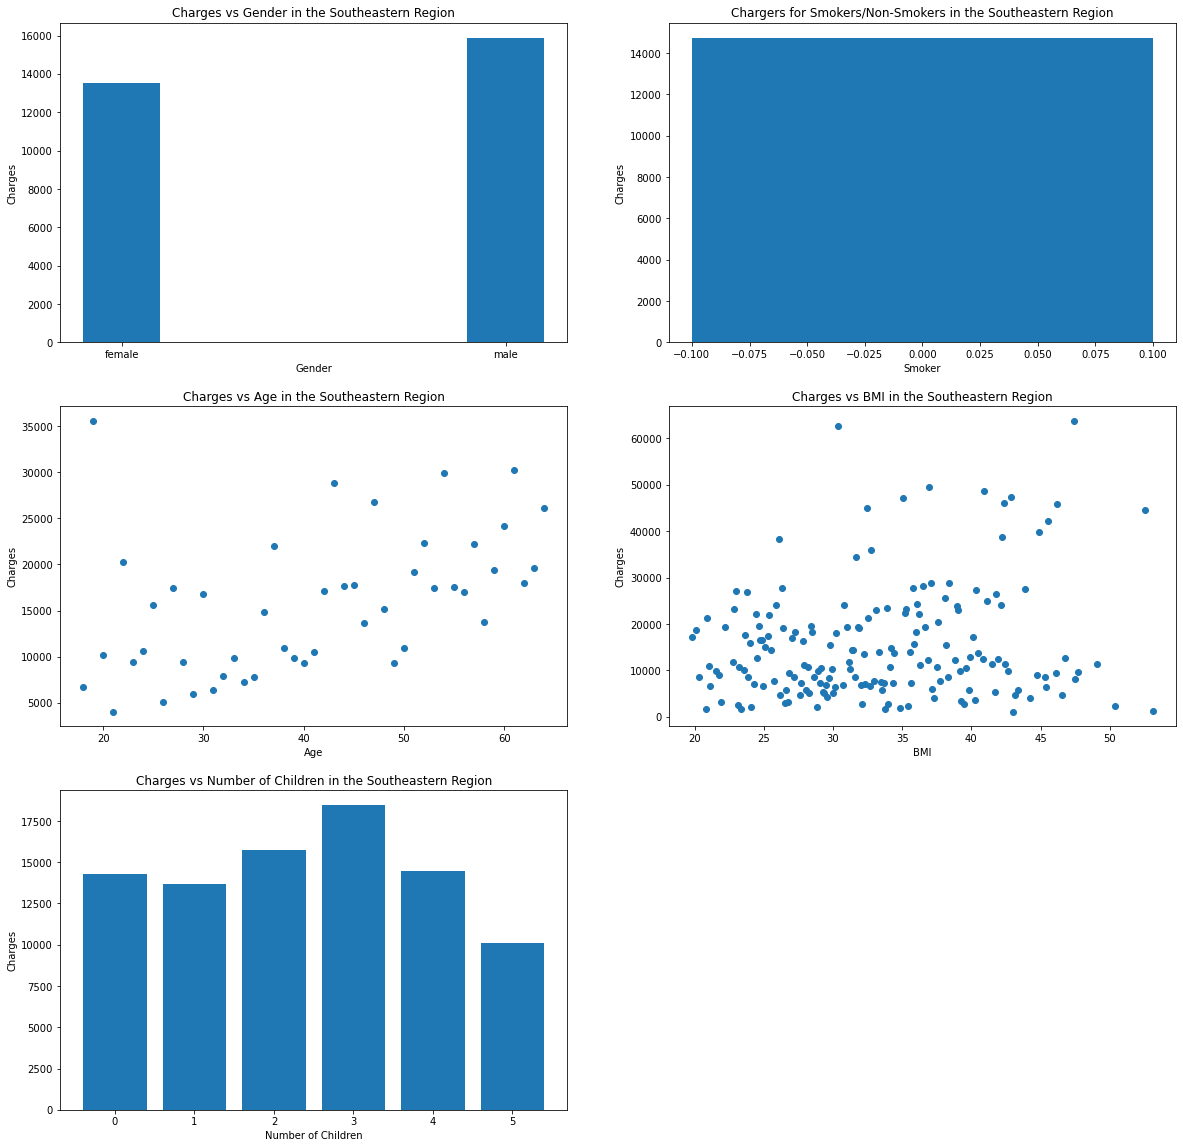

In [56]:
fig,axs = plt.subplots(3,2,figsize=(20,20))

axs[0,0].bar(SE_by_sex['sex'],SE_by_sex['charges'],width=0.2)
plt.ylim(0,20000)
plt.yticks(np.arange(0,20000,2500))
axs[0,0].title.set_text('Charges vs Gender in the Southeastern Region')
axs[0,0].set_xlabel('Gender')
axs[0,0].set_ylabel('Charges')

axs[0,1].bar(SE_by_smoker['smoker'],SE_by_smoker['charges'],width=0.2)
plt.ylim(0,45000)
plt.yticks(np.arange(0,45000,10000))
axs[0,1].title.set_text('Chargers for Smokers/Non-Smokers in the Southeastern Region')
axs[0,1].set_xlabel('Smoker')
axs[0,1].set_ylabel('Charges')


axs[1,0].scatter(SE_by_age['age'],SE_by_age['charges'])
axs[1,0].title.set_text('Charges vs Age in the Southeastern Region')
axs[1,0].set_xlabel('Age')
axs[1,0].set_ylabel('Charges')


axs[1,1].scatter(SE_by_bmi['bmi'],SE_by_bmi['charges'])
axs[1,1].title.set_text('Charges vs BMI in the Southeastern Region')
axs[1,1].set_xlabel('BMI')
axs[1,1].set_ylabel('Charges')


fig.delaxes(axs[2,1])

axs[2,0].bar(SE_by_children['children'],SE_by_children['charges'])
axs[2,0].title.set_text('Charges vs Number of Children in the Southeastern Region')
axs[2,0].set_xlabel('Number of Children')
axs[2,0].set_ylabel('Charges')


plt.show()

Statistical tests to test the significance of the relationships between variables

In [57]:
pearsonr(SE_by_age['age'],SE_by_age['charges'])

(0.46687712914098806, 0.0009389122764438713)

In [58]:
pearsonr(SE_by_children['children'],SE_by_children['charges'])

(-0.3134838254333364, 0.5451776201513118)

In [59]:
pearsonr(SE_by_bmi['bmi'],SE_by_bmi['charges'])

(0.1843348339553679, 0.01377215043777106)

In [60]:
SE_by_sex

,sex,charges
0,female,13499.669243
1,male,15879.617173


In [61]:
SE_by_smoker

,smoker,charges
0,0,14735.411438


Insights:

1 - Smokers are charged more for insurance across all regions. the average charge on a smoker is 380% higher than the average charge on a non-smoker.

2 - Generally, older people are charged more for medical insurance. However, the age range of 37-41 does not follow the trend. People in this age range are charged less compared to the people who are older than them. We can explain why the age group of 37-41 has a reasonably low insurance cost and that's because it has less than half the proportion of smokers compared to the age ranges right below or above it. This is why the insurance cost seriously dropped for that range and it doesn't align with the trend. Again we witness the significance of the smoker effect on the insurance costs.

3 - Males are charged more on average compared to females. 

4 - The general trend is that medical insurance charges increase with BMI. However, there is one BMI range that had an average of charges equivalent to the lowest one and that is the BMI range of 48-51. Digging deeper into the dataset, we see that there are only 3 people in the bmi range of 48-51 and none of them are smokers. This is what dropped the insurance cost. In contrast,the people with bmi in the range of 36-39 are more likely to be smokers. the proportion of smokers in that bmi range is considerably higher than the proportions in the near bmi ranges. Which is why there is a peak in insurance cost at that bmi range. As for the bmi range of 48-51, there are only 2 people in that range and one of which is a smoker. that's why the average cost is high for that bin. Smoking has a significant effect on insurance cost in general.  

5 - We can see that having more than 4 children drops the insurance cost by a reasonable amount while having 2 or 3 children will result in the same cost. Having 1 or 0 children result in very similar costs as well. The trend is that insurance costs rise with the number of children until the latter exceeds 3; then it becomes cheaper. 

6 - The average medical insurance charges in the southeast region is 111.4% higher than the average across all four regions. Both the northwest and southwest regions have below average medical insurance costs while the charges in the northeast are slightly above higher albeit nowhere near as high as the charges in the southeast region.

7 - The southeast region has the highest proportion of smokers which is one of the reasons why the average insurance cost there is the highest compared to other regions.

8 - The southeast region also has the highest average bmi of all regions which is in the range of 33-36. Based on the average charges per BMI range, the 33-36 BMI range is charged 15,213$ on average while the 27-30 and 30-33 ranges are charged anywhere between 11,000 and 14,372 (the other 3 regions). This also relates to the aforementioned fact that the southeast region has the highest proportion of smokers.

9 - The southeast region has a slightly higher proportion of males which also raises the cost of insurance a bit; but not that significantly. 

10 - The age spread across the regions is very similar so the age isn't really playing a role in increasing insurance costs in the southeast region.

11 - The southeast region has the highest number of families with 0-2 children which increases the insurance cost as mentioned earlier. Families with up to 3 children pay more insurance compared to families with 4 or more.

12 - In the northeast, southeast and southwest regions, the average medical insurance charges is highly correlated with whether the person is a smoker or not. The correlation factor across all regions is around 0.8. Smoking is the highest correlated predictor variable to insurance charges. Then, the 2nd and 3rd predictor variables with the highest correlation factor are age and bmi, respectively, with values between 0.3 and 0.4.

13 - BMI and age have a significant effect on the charges (low p-value) while the number of children does not.

14 - In summary, what explains the higher cost of insurance in the southeast region compared to the other 3 regions is it's high proportion of smokers and high average bmi. The average number of children in the southeast also raises the charge but the effect is moderately significant. the correlation between bmi/smokers and charges is the highest of all predictor variables.